In [10]:
from collections import defaultdict
import cv2
import os
import re
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np



def plot_digit_arr(img_data):
    shape = img_data.shape[0]
    size = int(shape**0.5)
    img = img_data.reshape(size, size)
    plt.imshow(img, cmap="binary")
    plt.axis("off")

def crop_images(paths):
    i = 0
    img_dir = os.path.join(os.getcwd(), "datasets", "images")
    if not os.path.exists(img_dir):
        os.mkdir(img_dir)
    for path in paths:
        i += 1
        new_img_path = os.path.join(img_dir, "img{}.png".format(i))
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = img_data[0:45, 0:278]
        cv2.imwrite(new_img_path, img)

def split_image_digits(path, out_dir="newer_images"):
    new_dirname = os.path.split(path)[-1].split(".")[0]
    new_dir = os.path.join(os.getcwd(), "datasets", out_dir)
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    new_path = os.path.join(new_dir, new_dirname)
    if not os.path.exists(new_path):
        os.mkdir(new_path)
    img = cv2.imread(path)
    img1 = img[0:44, 0:92]
    img2 = img[0:44, 92:184]
    img3 = img[0:44, 184:276]
    cv2.imwrite(os.path.join(new_path, "image1.png"), img1)
    cv2.imwrite(os.path.join(new_path, "image2.png"), img2)
    cv2.imwrite(os.path.join(new_path, "image3.png"), img3)
    return new_path

def create_image_data(img_dirname):
    new_image_paths = []
    images_dir = os.path.join(os.getcwd(), "datasets", img_dirname)
    paths = [[os.path.join(dn, fn) for fn in files] for dn, _ , files in os.walk(images_dir)]
    paths = sum(paths, [])
    crop_images(paths)
    for path in paths:
        new_path = split_image_digits(path)
        new_image_paths.append(new_path)
    return new_image_paths
    
# def preprocess_image_data(image_path, n):
#     new_images = [os.path.join(image_path, fn) for fn in os.listdir(image_path)]
#     img1 = cv2.imread(new_images[0], cv2.IMREAD_GRAYSCALE)
#     img2 = cv2.imread(new_images[1], cv2.IMREAD_GRAYSCALE)
#     img3 = cv2.imread(new_images[2], cv2.IMREAD_GRAYSCALE)
#     #imgs = [img1.flatten(), img2.flatten(), img3.flatten()]
#     imgs = [img1, img2, img3]
#     dfs = {}
#     for i in range(len(imgs)):
#         img = imgs[i]
#         name = "image{}".format((i+1)+n)
#         df = img_to_dict(img)
#         dfs[name] = df
#     return dfs

# def img_to_dict(img):
#     p = 0
#     res = {}
#     for i in range(img.shape[0]):
#         p += 1
#         col = "pixel{}".format(p)
#         pix = img[i]
#         res[col] = pix
#     return res

# def images_to_df(img_path, n):
#     dfs = preprocess_image_data(img_path, n)
#     main_df = pd.DataFrame(dfs.values(), index=dfs.keys())
#     return main_df

# def save_image_data(imgs_path):
#     dfs = []
#     n = 0
#     for img_name in os.listdir(imgs_path):
#         img_path = os.path.join(imgs_path, img_name)
#         df = images_to_df(img_path, n)
#         dfs.append(df)
#         n += 3
#     main_df = pd.DataFrame()
#     for df in dfs:
#         if len(main_df) == 0:
#             main_df = df
#         else:
#             main_df = pd.concat([main_df, df])
#     df_save_dir = os.path.join(os.getcwd(), "output")
#     if not os.path.exists(df_save_dir):
#         os.mkdir(df_save_dir)
#     main_df.to_csv(os.path.join(df_save_dir, "image_pixels_{}.csv".format(int(time.time()))))
#     return main_df
    
def train_predict_digits(X, y, digit=1):
    X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
    y_train_digit = (y_train == digit)
    y_test_digit = (y_test == digit)
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(X_train, y_train_digit)
    sgd_clf.predict(X_test[0])
    scores = cross_val_score(sgd_clf, X_train, y_train_digit, cv=3, scoring="accuracy")
    return scores

In [22]:
from collections import defaultdict
import cv2
import os
import re
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


def split_image_digits(path):
    img = cv2.imread(path)
    img1 = img[0:44, 0:92]
    img2 = img[0:44, 92:184]
    img3 = img[0:44, 184:276]
    # img1 = img1.reshape(-1, 4048).astype(np.int8)
    # img2 = img2.reshape(-1, 4048).astype(np.int8)
    # img3 = img3.reshape(-1, 4048).astype(np.int8)
    return img1, img2, img3

def normalize_img(img):
    img = img * 1.0/255
    return img

def crop_images(paths):
    i = 0
    img_dir = os.path.join(os.getcwd(), "datasets", "images")
    if not os.path.exists(img_dir):
        os.mkdir(img_dir)
    for path in paths:
        i += 1
        new_img_path = os.path.join(img_dir, "img{}.png".format(i))
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = img_data[0:45, 0:278]
        cv2.imwrite(new_img_path, img)

def create_image_data(img_dirname, outdirname="newer_images"):
    images_dir = os.path.join(os.getcwd(), "datasets", img_dirname)
    outdir = os.path.join(os.getcwd(), "datasets", outdirname)
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    paths = [[os.path.join(dn, fn) for fn in files] for dn, _ , files in os.walk(images_dir)]
    paths = sum(paths, [])
    crop_images(paths)
    i = 0
    for path in paths:
        img1, img2, img3 = split_image_digits(path)
        path1 = os.path.join(outdir, "image{}.png".format(i+1))
        path2 = os.path.join(outdir, "image{}.png".format(i+2))
        path3 = os.path.join(outdir, "image{}.png".format(i+3))
        cv2.imwrite(path1, img1)
        cv2.imwrite(path2, img2)
        cv2.imwrite(path3, img3)
        i += 3
    return outdir

img1_path = os.path.join(os.getcwd(), "datasets", "images", "img1.png")

new_path = create_image_data("images")
print(new_path)

c:\py_repos\image_classifier\datasets\newer_images


In [35]:
import os
import pandas as pd
import numpy as np
import cv2


def normalize_img(img):
    img = img * 1.0/255
    return img

def imgs_to_dict(dirname):
    img_dict = {}
    image_dir = os.path.join(os.getcwd(), "datasets", dirname)
    i = 0
    for fname in os.listdir(image_dir):
        img_path = os.path.join(image_dir, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_dict["image{}".format(i+1)] = img
        i += 1
    return img_dict
    
d = imgs_to_dict("newer_images")
print(d["image1"].shape)


def images_to_arr(obj):
    imgs = []
    if isinstance(obj, dict):
        imgs = [normalize_img(img) for img in obj.values()]
    elif isinstance(obj, str):
        dir_path = None 
        if os.path.isdir(imgs):
            dir_path = imgs
        else:
            dir_path = os.path.join(os.getcwd(), obj)
        for fname in os.listdir(dir_path):
            img_path = os.path.join(dir_path, fname)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = normalize_img(img)
            imgs.append(img)
    else:
        raise TypeError(f"type {type(obj)} is not supported")
    return np.array(imgs)

a = images_to_arr(d)
print(a.shape)


(44, 92)
(198, 44, 92)


(44, 92)


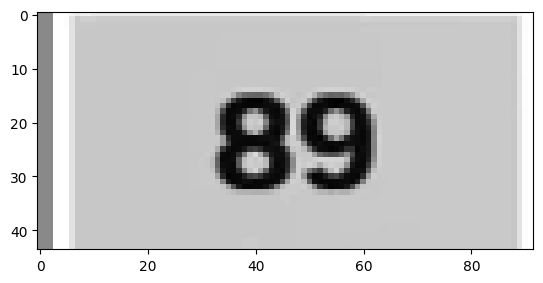

In [28]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt


image_dir = os.path.join(os.getcwd(), "datasets", "newer_images")
img1_path = os.path.join(image_dir, "image1.png")
img1 = cv2.imread(img1_path)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

print(img1.shape)

plt.imshow(img1, cmap="binary")

In [18]:
import numpy as np
import cv2 as cv
import os
 
img_path = os.path.join(os.getcwd(), "datasets", "digits", "digits.png")
img = cv.imread(img_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
x = np.array(cells)
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
print(gray.shape)
print(x.shape)
print("\n")
print(train.shape)
print(test.shape)

(1000, 2000)
(50, 100, 20, 20)


(2500, 400)
(2500, 400)


In [ ]:
import numpy as np
import cv2 as cv
import os
 
img_path = os.path.join(os.getcwd(), "datasets", "digits", "digits.png")
img = cv.imread(img_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
 
# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)
 
# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
 
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
 
# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
 
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

# Save the data
np.savez('knn_data.npz',train=train, train_labels=train_labels)
 
# Now load the data
with np.load('knn_data.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']